In [11]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plot

plot.rcParams["figure.figsize"] = (12, 9)

def plot_distr(distr):
    most_common = distr.most_common(100)
    tags_distr_labels, tags_distr_values = zip(*most_common)
    X = np.arange(len(tags_distr_labels))
    plot.bar(X, tags_distr_values)
    plot.axes().set_xticks(X)
    plot.axes().set_xticklabels(tags_distr_labels, rotation=90)
    ymax = max(tags_distr_values) + 1
    plot.ylim(0, ymax)
    plot.show()

def get_html_from_str(line):
    parsed_line = ujson.loads(line)
    return parsed_line.get('html')

Progress: 1000
Progress: 2000
Progress: 3000
Progress: 4000
Progress: 5000
Progress: 6000
Progress: 7000
Progress: 8000
Progress: 9000
Progress: 10000
Progress: 11000
Progress: 12000
Progress: 13000
Progress: 14000
Progress: 15000
Progress: 16000
Progress: 17000
Progress: 18000
Progress: 19000
Progress: 20000
Progress: 21000
Progress: 22000
Progress: 23000
Progress: 24000
Progress: 25000
Progress: 26000
Progress: 27000
Progress: 28000
Progress: 29000
Progress: 30000
Progress: 31000
Progress: 32000
Progress: 33000
Progress: 34000
Progress: 35000
Progress: 36000
0
0
Counter({u'Information Technology and Services': 2911, u'Marketing and Advertising': 2415, u'Internet': 1457, u'Construction': 1373, u'Management Consulting': 1340, u'Real Estate': 1180, u'Financial Services': 1055, u'Computer Software': 945, u'Health, Wellness and Fitness': 899, u'Nonprofit Organization Management': 872, u'Education Management': 834, u'Design': 829, u'Hospital & Health Care': 740, u'Retail': 732, u'Automotiv

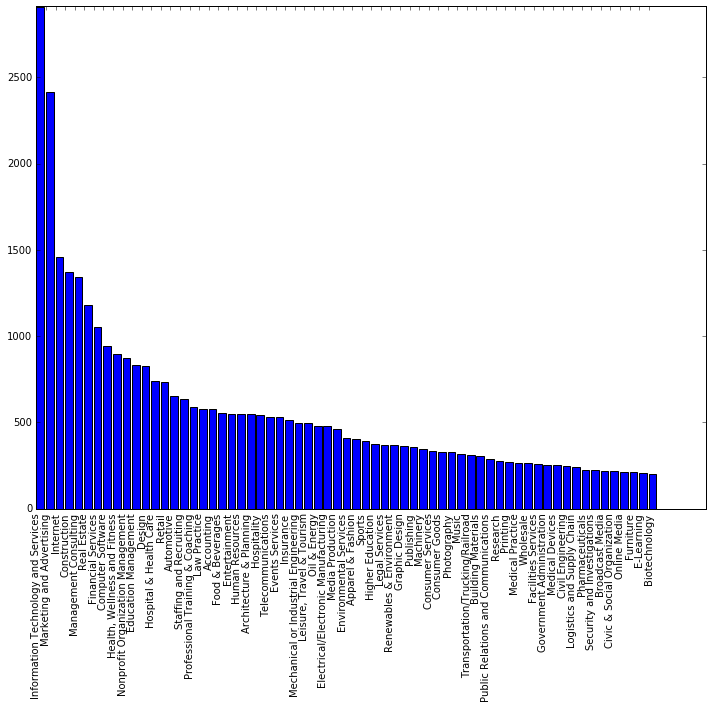

In [12]:
from collections import Counter

import ujson


KEYS = {'html', 'description', 'industry'}


def get_tags_distr(input_file_path):
    label_distr = Counter()
    instances_without_html = 0
    instances_without_descr = 0
    with open(input_file_path, 'r') as input_file:
        progress = 0
        for line in input_file:
            line_as_json = ujson.loads(line)
            assert set(line_as_json.keys()) <= KEYS
            if 'html' not in line_as_json:
                instances_without_html += 1
            if 'description' not in line_as_json:
                instances_without_descr += 1
            label_distr[line_as_json['industry']] += 1
            progress += 1
            if progress % 1000 == 0:
                print 'Progress: {}'.format(progress)
    print instances_without_html
    print instances_without_descr
    print label_distr
    print len(label_distr)
    plot_distr(label_distr)

    
get_tags_distr('../../data/companies.jsons')

Progress: 0
Progress: 1000
Progress: 2000
Progress: 3000
Progress: 4000
Progress: 5000
Progress: 6000
Progress: 7000
Progress: 8000
Progress: 9000
Progress: 10000
Progress: 11000
Progress: 12000
Progress: 13000
Progress: 14000
Progress: 15000
Progress: 16000
Progress: 17000
Progress: 18000
Progress: 19000
Progress: 20000
Progress: 21000
Progress: 22000
Progress: 23000
Progress: 24000
Progress: 25000
Progress: 26000
Progress: 27000
Progress: 28000
Progress: 29000
Progress: 30000
Progress: 31000
Progress: 32000
Progress: 33000
Progress: 34000
Progress: 35000
Progress: 36000


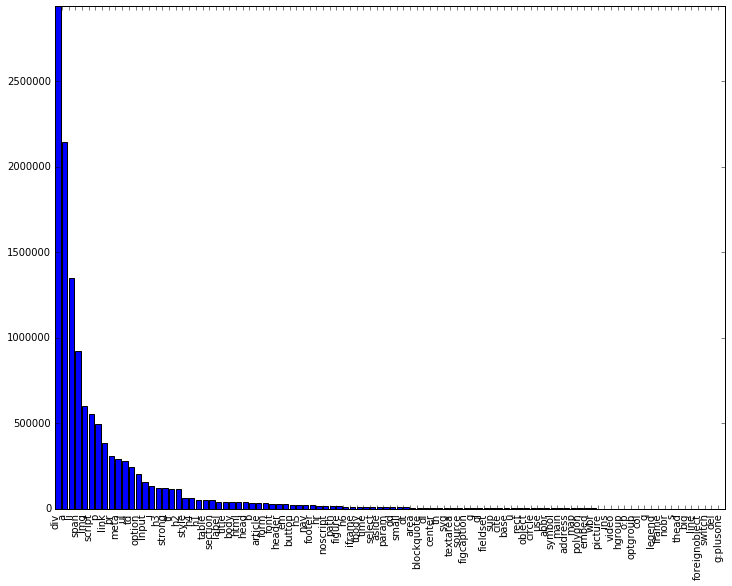

In [14]:
from collections import Counter

from bs4 import BeautifulSoup


def _update_tags_distr(html, tags_distr):
    parsed_html = BeautifulSoup(html, 'html.parser')
    for descendant in parsed_html.descendants:
        if descendant.name is not None:
            tags_distr[descendant.name] += 1


def get_tags_distr(input_file_path):
    tags_distr = Counter()
    with open(input_file_path) as f:
        progress = 0
        for line in f:
            html = get_html_from_str(line)
            if html is None:
                continue
            _update_tags_distr(html, tags_distr)
            if progress % 1000 == 0:
                print 'Progress: {}'.format(progress)
            progress += 1
    plot_distr(tags_distr)

    
get_tags_distr('../../data/companies.jsons')

Progress: 0
Progress: 1000
Progress: 2000
Progress: 3000
Progress: 4000
Progress: 5000
Progress: 6000
Progress: 7000
Progress: 8000
Progress: 9000
Progress: 10000
Progress: 11000
Progress: 12000
Progress: 13000
Progress: 14000
Progress: 15000
Progress: 16000
Progress: 17000
Progress: 18000
Progress: 19000
Progress: 20000
Progress: 21000
Progress: 22000
Progress: 23000
Progress: 24000
Progress: 25000
Progress: 26000
Progress: 27000
Progress: 28000
Progress: 29000
Progress: 30000
Progress: 31000
Progress: 32000
Progress: 33000
Progress: 34000
Progress: 35000
Progress: 36000
Counter({u'en': 27970, u'nl': 1620, u'es': 1583, u'fr': 985, u'pt': 920, u'de': 796, u'it': 644, u'da': 278, u'sv': 256, u'tr': 204, u'ru': 184, u'pl': 153, u'ro': 120, u'ja': 89, u'fi': 88, u'cs': 85, u'zh': 77, u'no': 77, u'vi': 51, u'tl': 51, u'he': 45, u'hr': 43, u'nb': 42, u'hu': 37, u'af': 35, u'EN': 35, u'ca': 34, u'el': 32, u'et': 32, u'sk': 32, u'': 30, u'bg': 29, u'id': 25, u'sl': 24, u'ko': 23, u'lt': 22, u

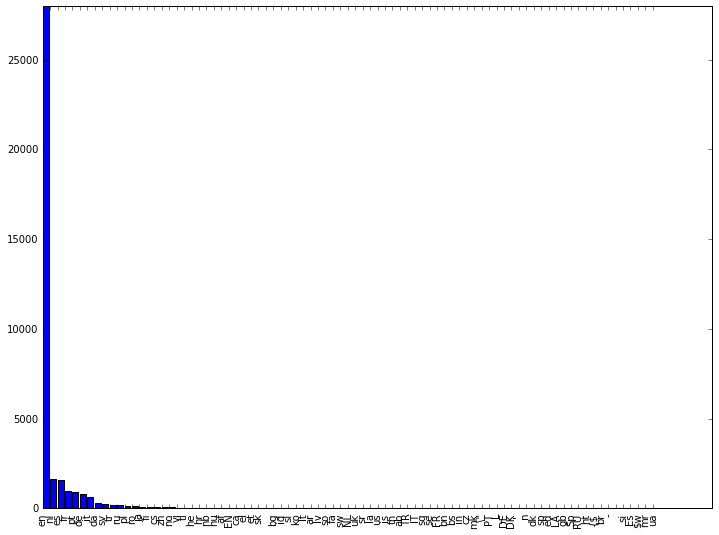

Counter({u'en': 29491, u'es': 1913, u'nl': 1522, u'fr': 956, u'pt': 930, u'it': 542, u'de': 364, u'da': 180, u'tr': 179, u'sv': 165, u'ru': 124, u'pl': 86, u'no': 72, u'ro': 70, u'cs': 59, u'fi': 30, u'id': 26, u'hr': 23, u'zh': 21, u'el': 20, u'hu': 18, u'so': 16, u'af': 14, u'he': 14, u'ar': 13, u'vi': 11, u'tl': 11, u'ja': 10, u'sk': 10, u'fa': 9, u'sl': 9, u'et': 7, u'lt': 7, u'bg': 7, u'lv': 5, u'sw': 5, u'uk': 3, u'th': 2, u'sq': 2, u'ko': 1})


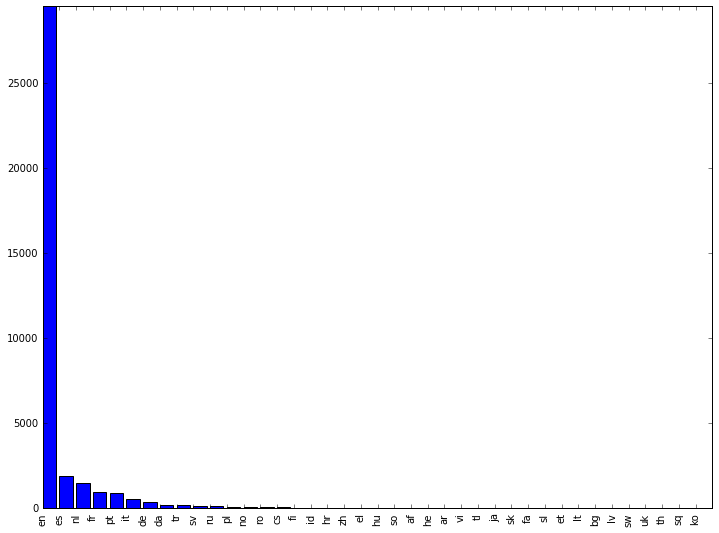

In [16]:
from collections import Counter
import ujson


def _get_lang_from_code(lang_code):
    return lang_code[:2]


def get_lang_distr(input_file_path):
    html_lang_distr = Counter()
    description_lang_distr = Counter()
    with open(input_file_path) as f:
        progress = 0
        for line in f:
            json = ujson.loads(line)
            html_lang = _get_lang_from_code(json['html_language'])
            descr_lang = _get_lang_from_code(json['description_language'])
            html_lang_distr[html_lang] += 1
            description_lang_distr[descr_lang] += 1
            if progress % 1000 == 0:
                print 'Progress: {}'.format(progress)
            progress += 1
    print html_lang_distr
    plot_distr(html_lang_distr)
    print description_lang_distr
    plot_distr(description_lang_distr)
    
get_lang_distr('../../data/companies_transformed.jsons')